# 크롤링

<여는태그>내용</닫는태그>  
<여는태그 속성명="속성값">내용</닫는태그>  
<여는태그 속성명="속성값" />

html: 전체 html 문서를 감싸는 태그입니다. 하나만 존재해야 하고 html 바깥에 DOCTYPE을 제외한 다른 태그가 있으면 안 됩니다.  
head: html 문서에 대한 정보를 나타내는 부분입니다. 하나만 존재해야하고, html 바로 아래에 있어야합니다.  
body: html 문서에서 실제적으로 보여지는 부분을 나타냅니다. 하나만 존재해야 하고, html 바로 아래, head 다음에 위치해야 합니다.  
title: head 안에 들어가는 태그로 제목표시줄의 내용을 나타냅니다.  
meta: 문서에 대한 설명을 표시합니다. 사람에게는 보이지 않고, 브라우저만 읽을 수 있습니다. 속성으로 charset="utf-8"이라고 한 것은 브라우저에게 한글인코딩을 UTF-8로 설정하라고 알린 겁니다. 이 부분이 있어야 한글이 깨지지 않습니다.  
h1: body 안에서 제목을 표시하는 태그입니다. 중요도에 따라 h1부터 h2, h3, ..., h6까지 있습니다.  
div: 구역을 표시하는 태그입니다. 눈에 보이지는 않지만 p와 img 태그를 하나의 구역으로 묶었습니다.  
p: 문단을 표시하는 태그입니다. 여기 안에 글의 내용을 넣으면 됩니다.  
img: 이미지를 표시하는 태그입니다. 아까 src라는 속성이 있었는데 src는 이미지 파일의 경로(위치)를 지정하는 속성입니다.  
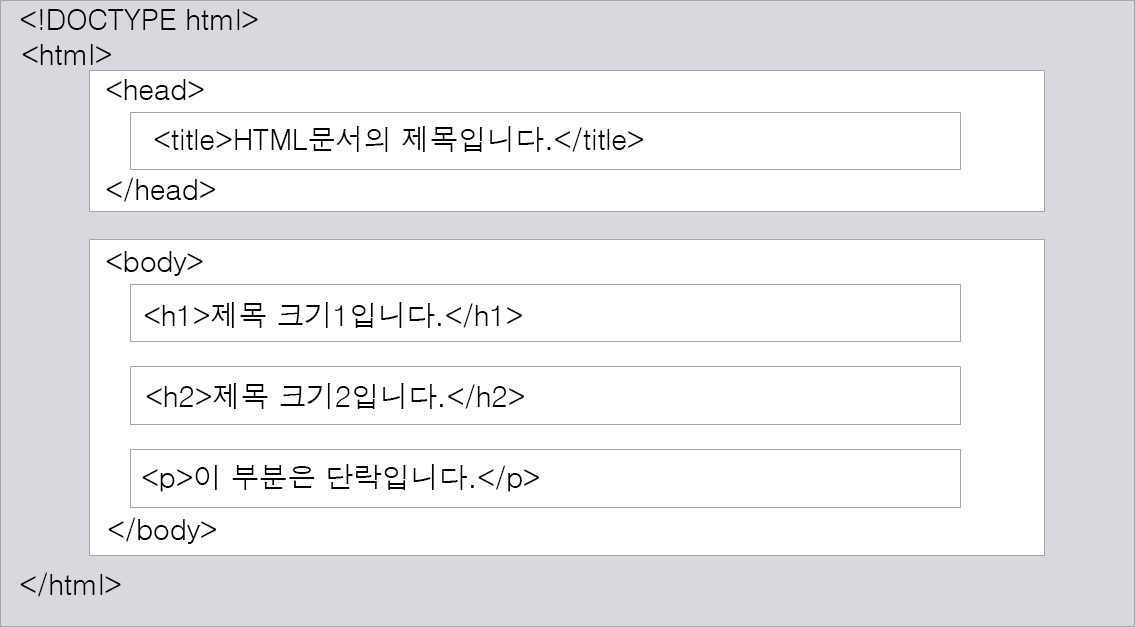

In [46]:
#_*_ coding: UTF-8 _*_
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

#### 크롤링을 위해서 urlib라이브러리 속의 urlopen함수를 import한다. urlib라이브러리 전체를 불러와도 상관없지만 그러면 메모리를 많이 쓰니까 필요한 함수만 불러오도록 한다.
#### bs4패키지에서 BeautifulSoup함수를 불러오고 csv함수도 따로 불러온다.
#### UTF-8은 한글을 읽을 수 있도록 도와준다.

In [47]:
html = urlopen("http://www.naver.com")
html

#### urlopen함수는 웹페이지를 통째로 가져온다.

## 웹문서 전체를 가져오기

In [48]:
bsObject = BeautifulSoup(html, "html.parser")
bsObject

<!DOCTYPE doctype html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/

#### BeautifulSoup를 이용하여 웹페이지 전체를 불러온다. 제일 처음에 DOCTYPE이 들어가있고 html태그로 시작한다.

In [49]:
bsObject.html

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mob

#### 첫줄은 빼고 html부분만 불러온다.

## head 가져오기

In [50]:
bsObject.head

<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.

#### head만 불러온다. 해석할 때는 여는태그와 닫는태그를 유심히 봐야한다. 여는태그가 있었지만 바로 닫는태그가 안 나왔고 내용으로 다른 여는태그들이 온다면 순서를 잘 파악하여 닫는태그를 개수를 맞추어 넣어줘야한다. 
#### 다섯 개의 meta태그가 닫는 태그가 없었으므로 마지막에 < /meta>를 다섯 개 넣어준다.

## title 가져오기

In [51]:
bsObject.head.title

<title>NAVER</title>

#### head내부의 title만 불러온다. 모든 웹페이지는 title을 가져야 한다.
#### 속성은 정의되어 있지 않다. 여는태그와 닫는태그의 사이에 내용이 들어간다.
#### 반드시 sequencial할 필요는 없다. 태그의 내용 속에 또 다른 태그가 들어갈 수 있다. 

In [52]:
bsObject.head.title.get_text()  # bsObject.head.title.text.strip()

'NAVER'

#### .get_text()함수를 이용하면 <>안에 들어있는 내용을 모두 없애고 나머지 값을 str로 받게 된다. 
#### text.strip()함수도 마찬가지 결과를 받는다.

## meta 데이터 가져오기

In [82]:
bsObject.head.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="origin" name="Referrer"/>,
 <meta content="text/javascript" http-equiv="Content-Script-Type"/>,
 <meta content="text/css" http-equiv="Content-Style-Type"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="width=1100" name="viewport"/>,
 <meta content="NAVER" name="apple-mobile-web-app-title">
 <meta content="index,nofollow" name="robots">
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
 <meta content="네이버" property="og:title"/>
 <meta content="https://www.naver.com/" property="og:url"/>
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
 <meta content="summary" name="twitter:card"/>
 <meta content="" name="twitter:title"/>
 <meta content="https://www.naver.com/" name="twitter:url"/>
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobi

#### find_all()은 ()안의 태그를 모두 불러온다. 여기서는 meta태그를 모두 불러온다.
#### 보기에 위의 head만 불러왔을 때보다 길어보이지만, 닫는태그를 중심으로 meta태그들을 콤마로 구분하여 모두 불러왔기 때문에 내용에 속하는 태그들이 중복적으로 가져와져서 길어 보이는 것이다.

## meta 데이터의 모든 content 가져오기

In [79]:
for meta in bsObject.head.find_all('meta'):
    print(meta.get('name'))

None
Referrer
None
None
None
viewport
apple-mobile-web-app-title
robots
description
None
None
None
None
twitter:card
twitter:title
twitter:url
twitter:image
twitter:description


#### meta에 헤드에 있는 meta데이터를 다 넣는다. 
#### .get은 특정 property 값을 가져올 때 사용한다. 여기서는 content의 값을 모두 불러온다. 
#### meta태그에 content라는 property가 없을 때는 None값을 출력한다.

## meta 데이터 중 원하는 tag 가져오기

bsObject.head.find("meta", {"name":"description"})

In [83]:
bsObject.head.find("meta", {"name":"description"})

<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:description">
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://pm.pstatic.net/css/main_v190219.css" rel="stylesheet" type="text/css"/>
<link href="https://pm.pstatic.net/css/webfont_v170623.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/sstat

#### find()함수는 콤마 앞에 위치하는 태그 중 콤마 뒤의 특정property의 특정 value를 가진 태그만 불러올 때 사용한다. 모든 메타태그 중에서 name="discription"라는 속성을 가진 태그를 통째로 다 가져오라는 뜻이다.
#### find_all은 특정 태그이름을 가진 태그를 다 가져오고, find함수는 좀 더 구체적으로 태그를 불러오는 것이다.
#### 해당태그의 닫는태그가 있는 곳까지가 하나의 태그이기 때문에 그 속의 내용에 해당하는 태그들도 모두 불러와진다.

In [85]:
bsObject.head.find("meta", {"name":"description"}).get('content')

'네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요'

#### 뒤에 .get()을 붙이면 ()안의 property의 값을 불러오라는 뜻이고 여기서는 content의 값을 불러온다.
#### 뒤의 태그들에도 content가 있지만 그것들은 내용에 해당하는 각 태그의 속성일 뿐이기 때문에 해당하지 않는다.

In [19]:
bsObject.head.find("meta", {"content":"네이버"}).get('property')

'og:title'

#### meta태그 중 속성이 content고, 그 값이 네이버인 태그에서 속성property의 값을 불러온다.

## 모든 링크의 텍스트와 주소 가져오기

In [20]:
for link in bsObject.find_all('a'):
    print(link.get_text(), link.get('href'))

연합뉴스 바로가기 #news_cast
주제별캐스트 바로가기 #themecast
타임스퀘어 바로가기 #time_square
쇼핑캐스트 바로가기 #shp_cst
로그인 바로가기 #account
네이버 /
네이버를 시작페이지로 http://help.naver.com/support/alias/contents2/naverhome/naverhome_1.naver
쥬니어네이버 http://jr.naver.com
해피빈 http://happybean.naver.com/main/SectionMain.nhn
자동완성 펼치기 javascript:;
한글 입력기 javascript:;
도움말 보기 https://help.naver.com/support/contents/contents.nhn?serviceNo=606&categoryNo=16658
ON선택됨 #
OFF #
로그인 https://nid.naver.com/nidlogin.login
자세히 https://help.naver.com/support/alias/search/word/word_16.naver
자세히 https://help.naver.com/support/contents/contents.nhn?serviceNo=606&categoryNo=16659
도움말 https://help.naver.com/support/service/main.nhn?serviceNo=606&categoryNo=1987
신고 https://help.naver.com/support/contents/contents.nhn?serviceNo=605&categoryNo=18215
검색어저장 켜기 javascript:;
자동완성 끄기 javascript:;
도움말 https://help.naver.com/support/service/main.nhn?serviceNo=606&categoryNo=1987
신고 https://help.naver.com/support/contents/contents.nhn?serviceNo=605&categoryNo=18215

#### bsObject(전체)에서 find_all()로 a태그를 다 불러온다. 그 모든 a태그를 link로 받아서 loop를 돌린다.
#### 각 a태그에 대해 .get_text()를 이용하여 <>밖의 text를 str로 받아 출력하고 .get()함수로 속성 herf의 속성값 또한 출력한다.

## 예제: 네이버 베스트셀러 주간 순위에 있는 책의 정보를 가져오기
첫페이지에 있는 25권의 책목록에서 링크를 추출하여 각 추출된 링크로 접속하여 책이름, 저자, 가격 정보등을 출력

In [86]:
html = urlopen('https://book.naver.com/bestsell/bestseller_list.nhn')
bsObject = BeautifulSoup(html, "html.parser")

#### urlopen으로 웹페이지를 받고 beautifulSoup를 이용하여 메모리에 입력한다.

In [45]:
bsObject

<!DOCTYPE doctype html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/

In [23]:
for n in range(0,25):
    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    title = dt.select('a')[0].get_text()
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
    print(n+1, title, author, publisher)

1 공부머리 독서법  최승필 책구루
2 철학은 어떻게 삶의 무기가 되는가  야마구치 슈 다산초당
3 아주 작은 습관의 힘  제임스 클리어 비즈니스북스
4 설민석의 한국사 대모험 9  설민석 아이휴먼
5 고요할수록 밝아지는 것들  혜민 수오서재
6 탐구가 즐거워지는 명랑사회 세이펜버젼 (본책64권)  이수출판출판부 이수(전집)
7 추리 천재 엉덩이 탐정 7  트롤 아이세움
8 에어프라이어 만능 레시피북  강지현 엔트리
9 쓰레기처럼 사랑하라  김달 비사이드
10 말센스  셀레스트 헤들리 스몰빅라이프
11 나는 나로 살기로 했다  김수현 마음의숲
12 추리 천재 엉덩이 탐정 6  트롤 아이세움
13 추리 천재 엉덩이 탐정 1  트롤 아이세움
14 13번째 증언  윤지오 가연
15 가장 예쁜 생각을 너에게 주고 싶다  나태주 알에이치코리아
16 추리 천재 엉덩이 탐정 2  트롤 아이세움
17 인어가 잠든 집  히가시노 게이고 재인
18 추리 천재 엉덩이 탐정 3  트롤 미래엔아이세움
19 수미네 반찬  김수미 성안당
20 추리 천재 엉덩이 탐정 5  트롤 아이세움
21 추리 천재 엉덩이 탐정 4  트롤 아이세움
22 꽃을 보듯 너를 본다  나태주 지혜
23 아이의 떼 거부 고집을 다.루.다  정유진 미스터제이
24 해커스 토익 기출 보카  David Cho 해커스어학연구소
25 스즈키 바이올린 교본 1  세광음악 편집부 세광음악출판사


#### 1위부터 25위까지 불러오고 싶기 때문에 range를 0부터 24까지로 설정하여 n으로 받는다. find를 이용하여 dt태그 중 id의 속성값이 book_title_'n'인 태그를 특정하여 dt로 받는다. n은 숫자이기 때문에 str(n)으로 바꿔서 find함수 안에 입력해야한다.
#### select는 find_all과 비슷하지만 해당 내용을 list type으로 저장한다. a태그를 모두 찾아서 list로 만들고 [0]으로 가장 첫 번째 순서의 태그로 특정한 후 get_text()로 <>바깥의 text를 title로 받는다.
#### next_sibling는 다음태그를 의미한다. return(enter키로 한 줄 띄우는 것)도 하나의 태그로 인식하기 때문에 next_sibling을 두 번 반복해서 입력해야 우리에게 화면상 보이는 다음 태그가 선택된다. 여기서는 dd태그가 선택되고 select('a')를 해서 그 속의 a태그 여러 개를 list로 받고 [0]으로 첫 번째 태그를 선택한 후 get_text()로 <>바깥의 text를 author로 받는다. precious_sibling은 바로 전 태그를 의미한다.
#### publisher는 dd태그에서 <>를 다 제외하고 맨 마지막에 위치하니까 dd태그에서 get_text를 하여 모든 <>를 없애주고 text만 들여온다. 나머지 text를 모두 붙여서 하나의 str로 받아오게 되므로 split()을 써서 스페이스를 기준으로 str를 나누어 list로 만든다. publisher는 맨 마지막에 위치하므로 그 list의 [-1]로 index를 잡으면 된다. 그 값을 publisher로 받는다.
#### 위에서 구한 모든 값은 str이고 이것들을 print하면 for문을 한 바퀴 돌린 것이다. 이를 0부터 24까지 25번 반복하면 된다. print대상의 첫 번째는 순위를 의미하므로 n+1을 해서 0번째가 1위가 될 수 있도록 조정해준다.
#### cf) split(,)을 하면 쉼표를 중심으로 쪼개진다.

In [39]:
# Create a file to write to, add headers row
with open('crawling.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['rank', 'title', 'author', 'publisher'])
        
    for n in range(0,25):
        dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
        title = dt.select('a')[0].get_text()
        author = dt.next_sibling.next_sibling.select('a')[0].get_text()
        publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
        writer.writerow([n+1, title, author, publisher])

#### 정보를 뽑아오는 과정은 위와 같지만 출력대신에 파일을 하나 만들어서 거기에 write 해주는 방법이다.
#### open()으로 정보를 입힐 새 파일을 열고 이름을 crawling.csv로 지어준다. 그리고 이 파일을 f라고 부르기로 한다. 'w'은 write하는 모듈이고, 만약에 csv파일을 읽고 싶다면 'r'로 read모듈을 적어주면 된다.
#### csv는 보통 엑셀에서 열리는 파일로 Comma Separated Value의 약자이다. 파일에 csv function을 사용하여 csv형식으로 만들어주는 것이고 writer(f)는 f에 write를 해준다는 것을 의미한다. 이렇게 write할 수 있는 csv형식을 만든 것을 writer로 받는다. writerow는 한 줄씩 입력해주는 기능으로 writer에 writerow을 이용하여 rank, title, author, publisher를 맨 윗 줄에 입력한다. 
#### 그 다음 0부터 25까지의 범위의 for문으로 rank, title, author, publisher의 정보를 구하고 각 정보들을 위에서 writerow한 str들의 순서대로 동일하게 writerow해주면 이들은 각각 column을 형성하여 총 4개의 column, 맨 윗 줄을 포함하여 26줄을 이루게 될 것이다. 
#### 만약에 csv파일을 메모장 등으로 열면 콤마로 나눠져있을 것이다. 만약 엑셀에서 한글이 깨져서 보인다면 엑셀에서 import로 csv로 불러와야한다. file origin을 utf8로 바꾸면 한글이 깨지지 않고 잘 나올 것이다. delimited는 comma를 선택하면 된다.
#### 이 코드를 실행하면 crawling.csv라는 파일이 생성된다.